In [1]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import networkx as nx
import matplotlib.pyplot as plt
import requests

In [2]:
url = "https://data.nasa.gov/data.json"

response = requests.get(url)
nasa_json = response.json()

# Extract the id, title, description, and keyword for each dataset
ids = []
titles = []
descriptions = []
keywords = []
for dataset in nasa_json['dataset']:
    ids.append(dataset['identifier'])
    titles.append(dataset['title'])
    descriptions.append(dataset['description'])
    if 'keyword' in dataset and dataset['keyword'] is not None:
        keywords.append(dataset['keyword'])
    else:
        keywords.append('')

# Create a DataFrame from the dataset metadata
nasa_title = pd.DataFrame({'ID': ids, 'Title': descriptions})
nasa_title

,ID,Title
0,urn:nasa:pds:context_pds3:data_set:data_set.ro...,This dataset contains EDITED RAW DATA of the s...
1,urn:nasa:pds:context_pds3:data_set:data_set.ne...,The NEAR Eros Radio Science Data Set is a time...
2,urn:nasa:pds:context_pds3:data_set:data_set.nh...,This data set contains Calibrated data taken b...
3,urn:nasa:pds:context_pds3:data_set:data_set.ro...,"This is a Rosetta Radio Science data set, coll..."
4,urn:nasa:pds:context_pds3:data_set:data_set.ea...,This data set is intended to include all repor...
...,...,...
22059,C179002907-ORNL_DAAC,Data from the Tracing Architecture and Radiati...
22060,C2036877952-POCLOUD,Day and night spatially gridded (L3) global NA...
22061,C2445456434-ORNL_CLOUD,This dataset contains gridded estimations of d...
22062,NASA-877__2,Apollo 16 Sample Catalog by Graham Ryder and M...


In [3]:
len(response.json()["dataset"])

22064

In [4]:
# Preprocess the text data
stop_words = set(stopwords.words('english'))
my_stopwords = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'v1', 'v03', 'l2', 'l3', 'l4', 'v5.2.0', 'v003', 'v004', 'v005', 'v006', 'v7', '\n']
nasa_title['title_processed'] = nasa_title['Title'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if (word.lower() not in stop_words) and (word.lower() not in string.punctuation) and (word.lower() not in my_stopwords)]))
nasa_title

,ID,Title,title_processed
0,urn:nasa:pds:context_pds3:data_set:data_set.ro...,This dataset contains EDITED RAW DATA of the s...,dataset contains edited raw data second earth ...
1,urn:nasa:pds:context_pds3:data_set:data_set.ne...,The NEAR Eros Radio Science Data Set is a time...,near eros radio science data set time-ordered ...
2,urn:nasa:pds:context_pds3:data_set:data_set.nh...,This data set contains Calibrated data taken b...,data set contains calibrated data taken new ho...
3,urn:nasa:pds:context_pds3:data_set:data_set.ro...,"This is a Rosetta Radio Science data set, coll...",rosetta radio science data set collected comet...
4,urn:nasa:pds:context_pds3:data_set:data_set.ea...,This data set is intended to include all repor...,data set intended include reported timings obs...
...,...,...,...
22059,C179002907-ORNL_DAAC,Data from the Tracing Architecture and Radiati...,data tracing architecture radiation canopies t...
22060,C2036877952-POCLOUD,Day and night spatially gridded (L3) global NA...,day night spatially gridded global nasa skin s...
22061,C2445456434-ORNL_CLOUD,This dataset contains gridded estimations of d...,dataset contains gridded estimations daily eco...
22062,NASA-877__2,Apollo 16 Sample Catalog by Graham Ryder and M...,apollo 16 sample catalog graham ryder marc d. ...


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english', min_df=10, max_features=50000, binary=True, dtype=np.int8)

# Fit and transform the preprocessed text data using the CountVectorizer object
X = vectorizer.fit_transform(nasa_title['title_processed'])
# # Create a correlation matrix from the CountVectorizer output
# correlations = nasa_matrix.corr()

In [16]:
# Create a DataFrame from the CountVectorizer output
nasa_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=nasa_title['title_processed'])
nasa_matrix

,00,00 00,00 000,00 01,00 03,00 06,00 15,00 1986,00 2018,00 21,...,zoom mode,µm,µm radiative,µm µm,μm,μm geometric,μm isotropic,μm volumetric,ﬂew,ﬂew 11
title_processed,,,,,,,,,,,,,,,,,,,,,
dataset contains edited raw data second earth flyby ear2 closest approach ca took place november 13 2007 20:57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
near eros radio science data set time-ordered collection raw partially processed data collected near orbital mapping asteroid 433 eros,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
data set contains calibrated data taken new horizons linear etalon imaging spectral array instrument kem1 encounter mission phase version 2.0 data set data set contains leisa observations taken functional testing mu69 asteroid 486958 2014 mu69 encounter operations including test slow scan rate many leisa composition system scans along leisa scans lorri rider data set contains data acquired spacecraft 08/14/2018 01/31/2019 includes data downlinked 02/01/2019 future datasets may include data acquired spacecraft 08/13/2018 downlinked 01/31/2019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rosetta radio science data set collected comet escort phase 2015-07-01 2015-10-21 global gravity measurement comet 67p covers time 2015-10-05t10:16:25.000 2015-10-05t17:30:49.000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
data set intended include reported timings observed asteroid planet planetary satellite occultation events well occultation axes derived timings david w. dunham david herald version complete end 2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
data tracing architecture radiation canopies trac instrument processed determine fraction intercepted photosynthetically active radiation fpar eos validation core site kataba local forest approximately 20 km south mongu zambia measurements began 1999 continued 2002 measurements collected every month trac contains three pyranometers sensitive par wavelengths two sensors upward looking one downward looking trac instrument carried along three parallel transects 750 long spaced 250 apart 0.7 ground clear days near midday sensors measured par 32 hz resulting horizontal sampling interval 1.7 cm privette et al. 2002 transect divided 25 segments fpar values date/time stamp reported segment length spacing transects chosen sample area large enough representative km modis pixel par transmittance values determined upward viewing pyranometers trac instrument due large gaps canopy incident par estimated trac data 95 maximum par transmittance value transect fpar values observations averaged give segment-average fpar segment average fpar values averaged give transect-average fpar.the data file stored ascii text file comma-separated-value csv format column headers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
day night spatially gridded global nasa skin sea surface temperature sst products moderate-resolution imaging spectroradiometer modis onboard aqua satellite average daily weekly day monthly annual skin sst products available 4.63 9.26 km spatial resolution aqua launched nasa may 2002 sun synchronous polar orbit daylight ascending node 13:30 formation flying a-train earth observation satellites eos study global dynamics earth atmosphere land oceans modis captures data 36 spectral bands variety spatial resolutions two sst products present files first skin sst produced day night nsst observations derived long wave ir 11 12 micron wavelength channels using modified nonlinear sst algorithm intended provide continuity sst derived heritage current nasa sensors night second sst product generated using mid-infrared 3.95 4.05 micron wavelength channels unique modis sst derived measurements identified sst4 sst4 product lower uncertainty due sun glint used night generate products pixels binned integerized sinusoidal area grid iseag mapped equidistant cylindrical also known platte carre projection additional projec

In [28]:
# count frequency of ngrams
count_values = X.toarray().sum(axis=0)
# list of ngrams
vocab = vectorizer.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'monogram/bigram'})

In [29]:
df_ngram

,frequency,monogram/bigram
0,17129,data
1,9419,set
2,8802,data set
3,8161,contains
4,5415,time
...,...,...
31722,10,01 2008
31723,10,00z start
31724,10,00z 02
31725,10,0083


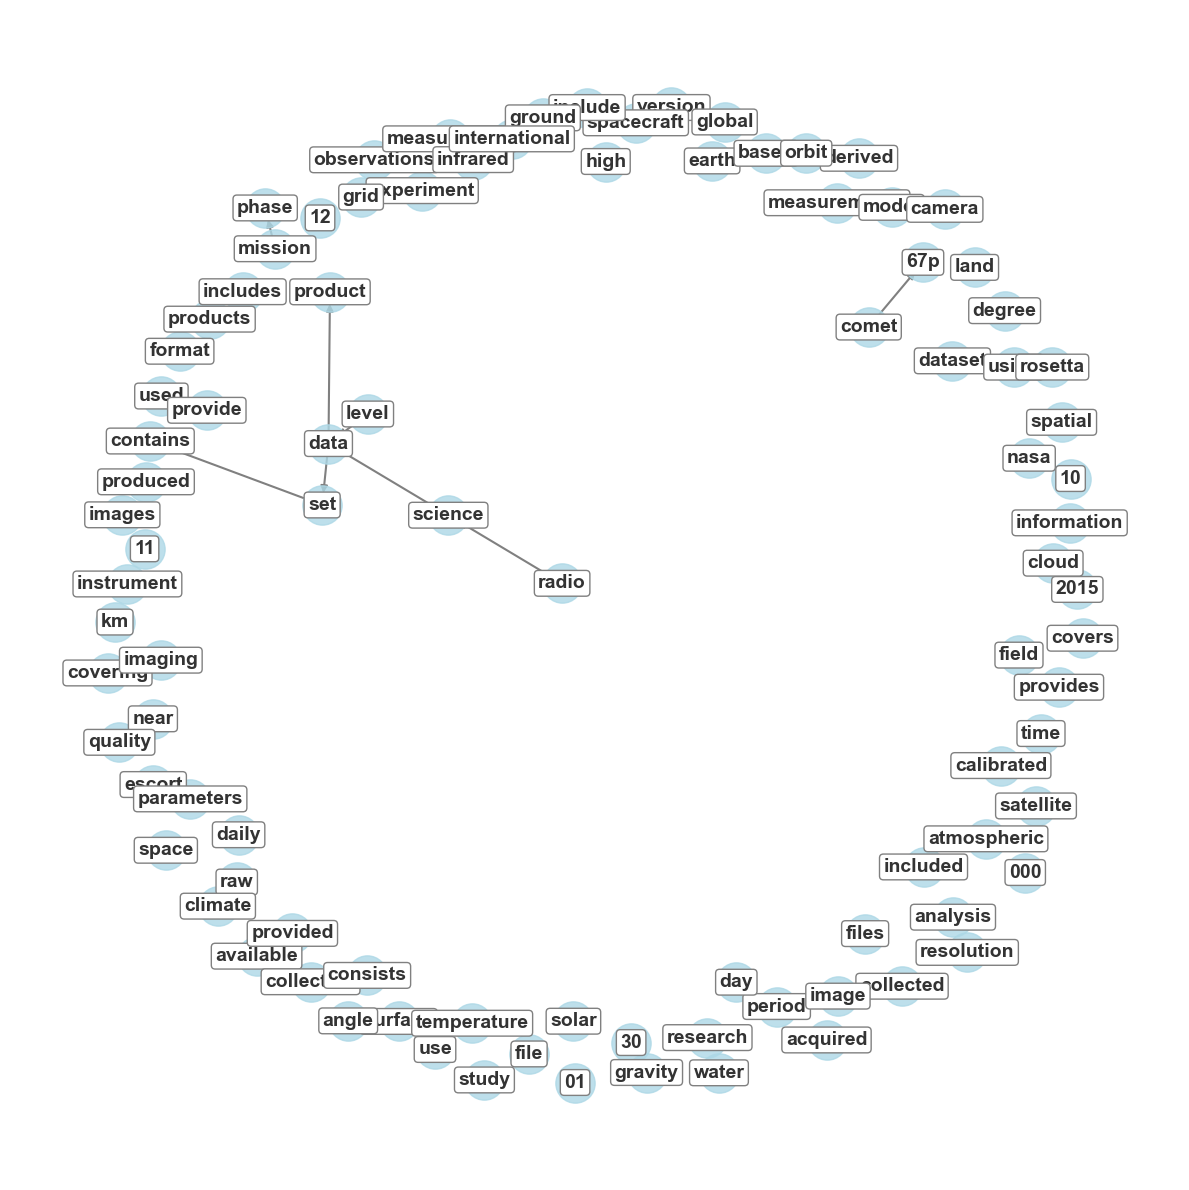

In [30]:
# Create a directed graph
G = nx.DiGraph()

df_ngram = df_ngram[df_ngram['frequency'] > 1500]

# Add nodes and edges to the graph
for _, row in df_ngram.iterrows():
    if len(row['monogram/bigram'].split()) == 1:  # only add monograms
        G.add_node(row['monogram/bigram'], weight=row['frequency'])
    elif len(row['monogram/bigram'].split()) == 2:  # only add bigrams
        word1, word2 = row['monogram/bigram'].split()
        G.add_edge(word1, word2, weight=row['frequency'])

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=3, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=800, alpha=0.8, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=14, font_family='Arial', font_weight='bold', font_color='black', horizontalalignment='center', verticalalignment='center', alpha=0.8, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.2'))
plt.axis('off')
plt.margins(x=0.1, y=0.1)
plt.tight_layout()
plt.show()

In [27]:
word1

'comet'

In [31]:
# Count how many times each pair of words occurs together in a title field
word_pairs = nasa_title['title_processed'].str.split().apply(lambda x: list(set(zip(x, x[1:])))).explode().reset_index()
word_pairs.columns = ['id', 'pair']
word_pairs_count = word_pairs.groupby('pair')['id'].count().reset_index()
word_pairs_count.columns = ['word_pair', 'count']

# Sort the word pairs by count in descending order
word_pairs_count = word_pairs_count.sort_values(by='count', ascending=False)

# Split the word_pair column into two separate columns
word_pairs_count[['word1', 'word2']] = pd.DataFrame(word_pairs_count['word_pair'].tolist(), index=word_pairs_count.index)

In [32]:
word_pairs_count

,word_pair,count,word1,word2
91799,"(data, set)",8797,data,set
279028,"(set, contains)",3766,set,contains
273972,"(science, data)",1921,science,data
199186,"(mission, phase)",1920,mission,phase
253284,"(radio, science)",1717,radio,science
...,...,...,...,...
143075,"(goes-8, derived)",1,goes-8,derived
143076,"(goes-8, geostationary)",1,goes-8,geostationary
143077,"(goes-8, goes)",1,goes-8,goes
143078,"(goes-8, goes-)",1,goes-8,goes-


In [33]:
# Filter the word pairs by count
word_pairs_count = word_pairs_count[word_pairs_count['count'] > 100]
word_pairs_count

,word_pair,count,word1,word2
91799,"(data, set)",8797,data,set
279028,"(set, contains)",3766,set,contains
273972,"(science, data)",1921,science,data
199186,"(mission, phase)",1920,mission,phase
253284,"(radio, science)",1717,radio,science
...,...,...,...,...
333900,"(volumetric, geometric)",101,volumetric,geometric
331564,"(vertical, levels)",101,vertical,levels
307211,"(temperature, water)",101,temperature,water
25132,"(aboard, second)",101,aboard,second


In [34]:
# # Create a network graph
# G = nx.Graph()
# for _, row in word_pairs_count.iterrows():
#     G.add_edge(row['word1'], row['word2'], weight=row['count'])

# # Draw the network graph
# plt.figure(figsize=(30, 30))
# pos = nx.spring_layout(G, k=0.5, iterations=50)
# edges = G.edges()
# weights = [G[u][v]['weight'] for u, v in edges]
# nx.draw_networkx_nodes(G, pos, node_size=1000, alpha=0.8)
# nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, edge_color='cyan')
# nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
# plt.axis('off')
# plt.show()

In [35]:
from nltk.util import ngrams

nasa_title['title_processed_bigram'] = nasa_title['title_processed'].apply(lambda x: list(ngrams(word_tokenize(x), 2)))

In [36]:
# Create a list of n-grams for each title
nasa_title['title_ngrams'] = nasa_title['title_processed'].apply(lambda x: list(nltk.ngrams(x.split(), 2)))

# Explode the list of n-grams so that each pair is a separate row
word_pairs = nasa_title.explode('title_ngrams')

# Group by the word pairs and count the number of occurrences
word_pairs_count = word_pairs.groupby('title_ngrams').size().reset_index(name='count')

# Filter out pairs that occur less than 50 times
word_pairs_count = word_pairs_count[word_pairs_count['count'] >= 50]

# Split the n-gram column into two separate columns for word1 and word2
word_pairs_count[['word1', 'word2']] = pd.DataFrame(word_pairs_count['title_ngrams'].tolist(), index=word_pairs_count.index)

# Concatenate the columns from the n-grams of different lengths for word1 and word2
word_pairs_count['word1'] = word_pairs_count.apply(lambda x: ' '.join(x['word1']) if len(x['word1']) > 1 else x['word1'][0], axis=1)
word_pairs_count['word2'] = word_pairs_count.apply(lambda x: ' '.join(x['word2']) if len(x['word2']) > 1 else x['word2'][0], axis=1)

# Drop the original title_ngrams column
word_pairs_count = word_pairs_count.drop('title_ngrams', axis=1)

# Sort the word pairs by count in descending order
word_pairs_count = word_pairs_count.sort_values(by='count', ascending=False)

# Print the top 10 word pairs
print(word_pairs_count.head(10))

        count          word1              word2
91799   11828        d a t a              s e t
279028   3916          s e t    c o n t a i n s
91496    2147        d a t a      p r o d u c t
199186   2037  m i s s i o n          p h a s e
273972   1973  s c i e n c e            d a t a
253284   1951      r a d i o      s c i e n c e
90084    1636        d a t a  c o l l e c t e d
73044    1560      c o m e t              6 7 p
91501    1558        d a t a    p r o d u c t s
179159   1427      l e v e l            d a t a


In [37]:
word_pairs_count

,count,word1,word2
91799,11828,d a t a,s e t
279028,3916,s e t,c o n t a i n s
91496,2147,d a t a,p r o d u c t
199186,2037,m i s s i o n,p h a s e
273972,1973,s c i e n c e,d a t a
...,...,...,...
297956,50,s t u d y,c o n d u c t e d
277170,50,s e n s o r,d a t a
197687,50,m i d - i n f r a r e d,3 . 9 5
215812,50,n u m b e r,p o i n t s


In [38]:
word_pairs_count['word1_len'] = word_pairs_count['word1'].apply(lambda x: len(x.split()))
word_pairs_count['word2_len'] = word_pairs_count['word2'].apply(lambda x: len(x.split()))

In [39]:
word_pairs_count[word_pairs_count["word1_len"] > 1]

,count,word1,word2,word1_len,word2_len
91799,11828,d a t a,s e t,4,3
279028,3916,s e t,c o n t a i n s,3,8
91496,2147,d a t a,p r o d u c t,4,7
199186,2037,m i s s i o n,p h a s e,7,5
273972,1973,s c i e n c e,d a t a,7,4
...,...,...,...,...,...
297956,50,s t u d y,c o n d u c t e d,5,9
277170,50,s e n s o r,d a t a,6,4
197687,50,m i d - i n f r a r e d,3 . 9 5,12,4
215812,50,n u m b e r,p o i n t s,6,6


In [40]:
# Create a list of bigrams for each title
nasa_title['title_bigrams'] = nasa_title['title_processed'].apply(lambda x: list(nltk.bigrams(x.split())))

# Explode the list of bigrams so that each pair is a separate row
word_pairs = nasa_title.explode('title_bigrams')

# Group by the word pairs and count the number of occurrences
word_pairs_count = word_pairs.groupby('title_bigrams').size().reset_index(name='count')

# Filter out pairs that occur less than 50 times
word_pairs_count = word_pairs_count[word_pairs_count['count'] >= 50]

# Split the bigram column into two separate columns
word_pairs_count[['word1', 'word2']] = pd.DataFrame(word_pairs_count['title_bigrams'].tolist(), index=word_pairs_count.index)

# Drop the original title_bigrams column
word_pairs_count = word_pairs_count.drop('title_bigrams', axis=1)

# Sort the word pairs by count in descending order
word_pairs_count = word_pairs_count.sort_values(by='count', ascending=False)

# Print the top 10 word pairs
print(word_pairs_count.head(10))

        count    word1      word2
91799   11828     data        set
279028   3916      set   contains
91496    2147     data    product
199186   2037  mission      phase
273972   1973  science       data
253284   1951    radio    science
90084    1636     data  collected
73044    1560    comet        67p
91501    1558     data   products
179159   1427    level       data


In [41]:
word_pairs_count

,count,word1,word2
91799,11828,data,set
279028,3916,set,contains
91496,2147,data,product
199186,2037,mission,phase
273972,1973,science,data
...,...,...,...
297956,50,study,conducted
277170,50,sensor,data
197687,50,mid-infrared,3.95
215812,50,number,points


In [42]:
# # Create a network graph
# G = nx.Graph()
# for _, row in word_pairs_count.iterrows():
#     G.add_edge(row['word1'], row['word2'], weight=row['count'])

# # Draw the network graph
# plt.figure(figsize=(30, 30))
# pos = nx.spring_layout(G, k=0.5, iterations=50)
# edges = G.edges()
# weights = [G[u][v]['weight'] for u, v in edges]
# nx.draw_networkx_nodes(G, pos, node_size=1000, alpha=0.8)
# nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, edge_color='cyan')
# nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
# plt.axis('off')
# plt.show()

In [43]:
word_pairs_counts = word_pairs_count[word_pairs_count['count'] > 1000]

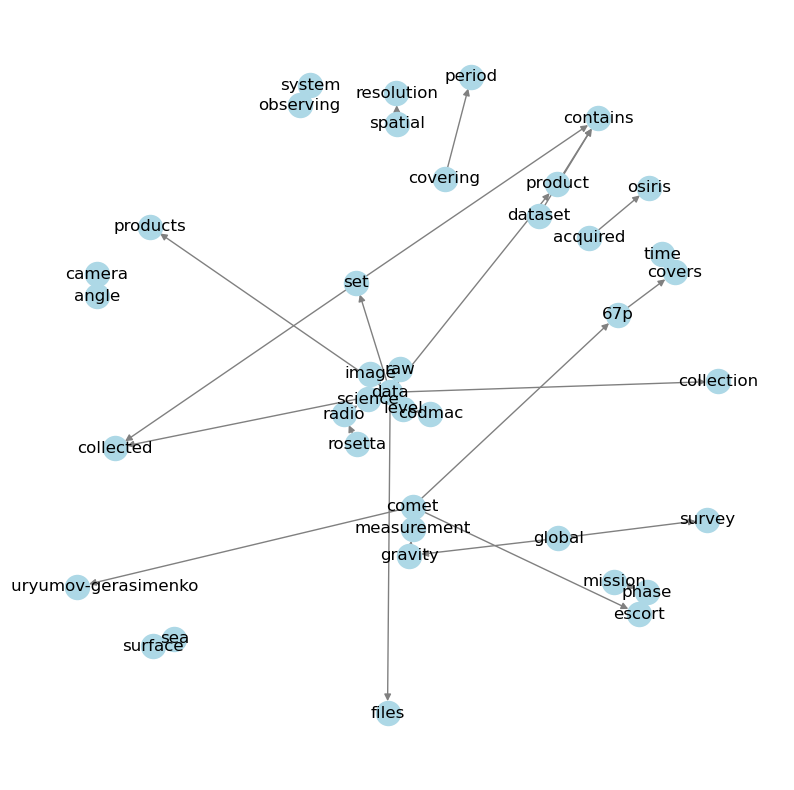

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges from word_pairs_count dataframe
G.add_edges_from(word_pairs_counts[['word1', 'word2']].values)
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw the graph
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', ax=ax)
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12)
plt.show()

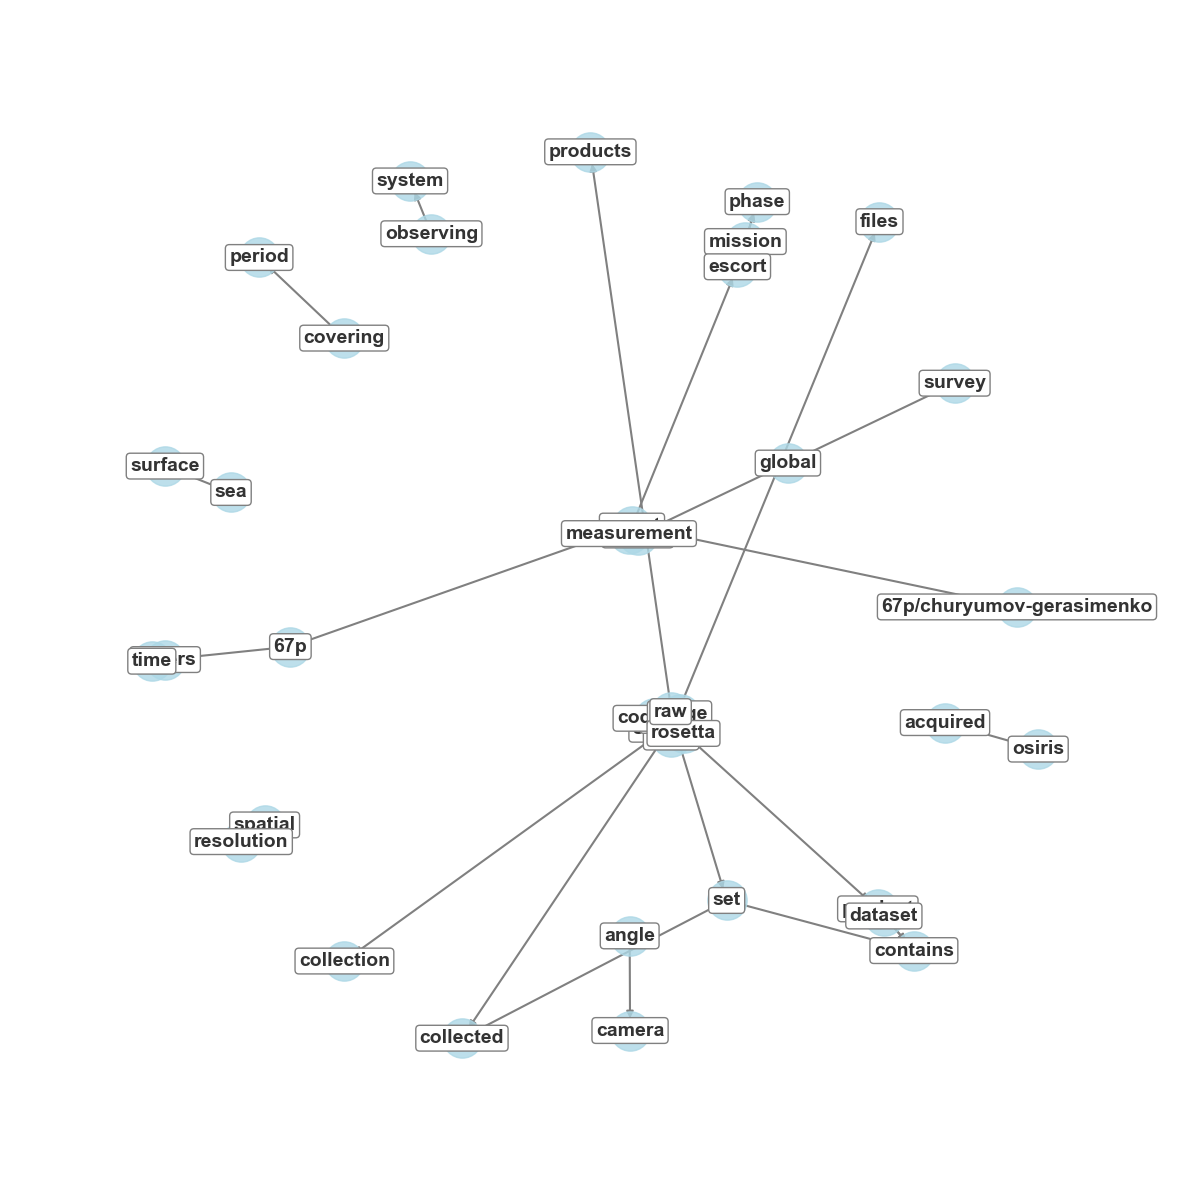

In [45]:
# Create a directed graph
G = nx.DiGraph()
for _, row in word_pairs_counts.iterrows():
    G.add_edge(row['word1'], row['word2'], weight=row['count'])

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=800, alpha=0.8, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=14, font_family='Arial', font_weight='bold', font_color='black', horizontalalignment='center', verticalalignment='center', alpha=0.8, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.2'))
plt.axis('off')
plt.margins(x=0.1, y=0.1)
plt.tight_layout()
plt.show()

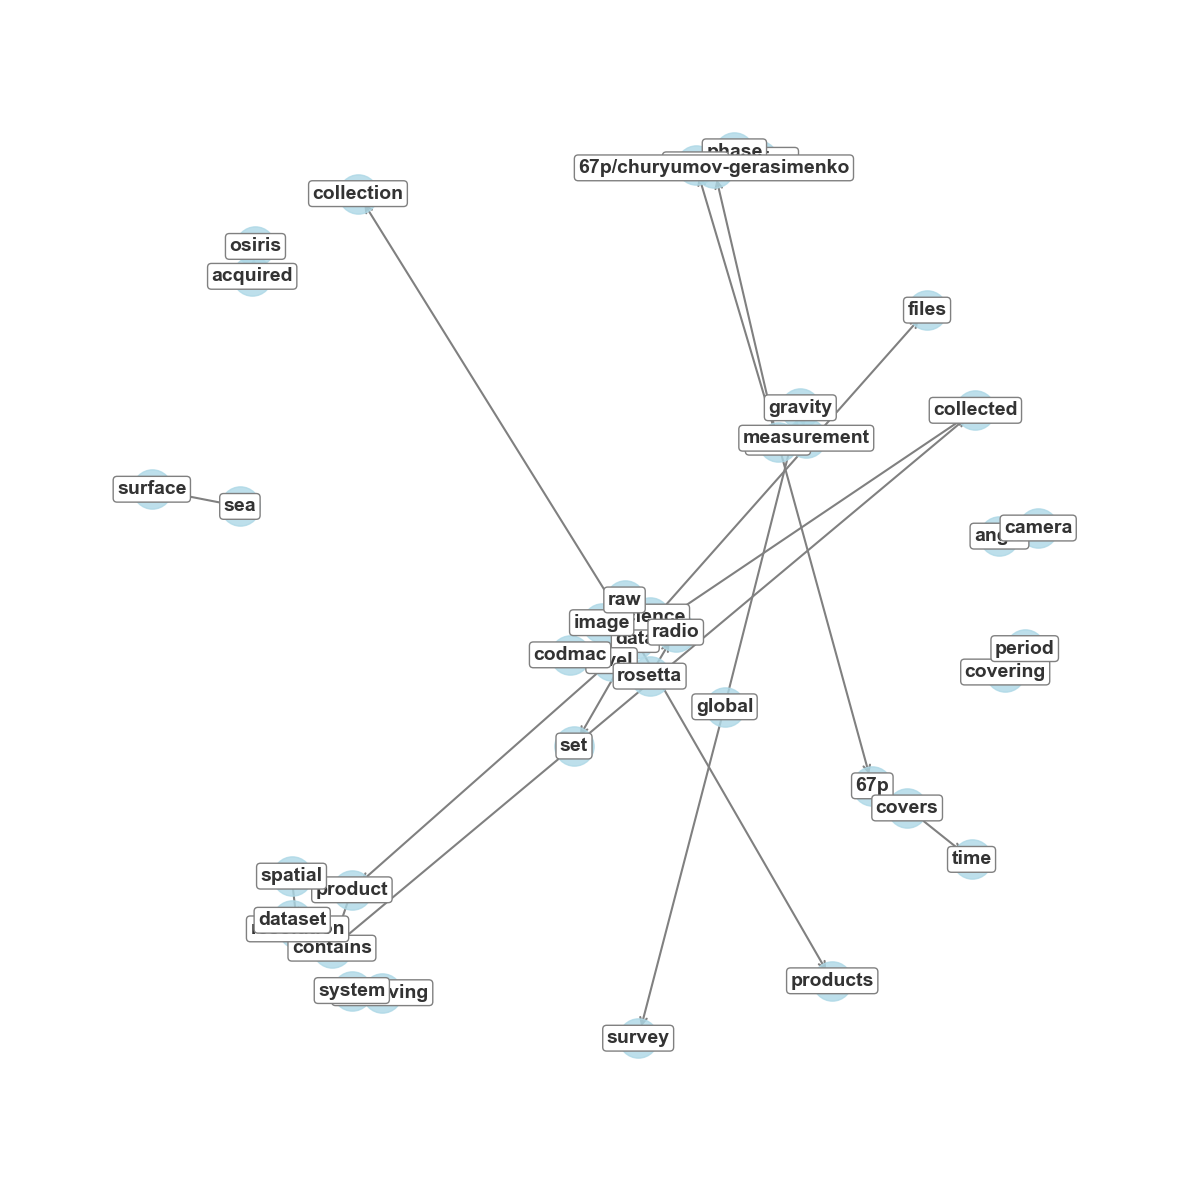

In [46]:
# Create a directed graph
G = nx.DiGraph()
for _, row in word_pairs_counts.iterrows():
    G.add_edge(row['word1'], row['word2'], weight=row['count'])

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=3, iterations=100)
nx.draw_networkx_nodes(G, pos, node_size=800, alpha=0.8, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1.5, edge_color='gray', arrowsize=12, arrowstyle='->')
nx.draw_networkx_labels(G, pos, font_size=14, font_family='Arial', font_weight='bold', font_color='black', horizontalalignment='center', verticalalignment='center', alpha=0.8, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.2'))
plt.axis('off')
plt.margins(x=0.1, y=0.1)
plt.tight_layout()
plt.show()